In [4]:
#In this program, we wanted to develop a classification model to predict 
#how many bank customers are exiting the bank, and how many are not

# But it is obserevd that the dataset is imbalanced and therefore
#we applied and tested three methods of handling Imbalanced dataset.

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

<IPython.core.display.Javascript object>

In [6]:
df=pd.read_csv("Churn_Modelling.csv")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# from the dataframe, we can say CustomerId, Surname, and Row Number or mutually exclusive for all customers, and do not 
#bear any reason for the exit of bank, so we can remove these features
#Creditscore , Balance, and EstimatedSalary are not categorical in nature and can have continous values
# All other remaining features are Categorical in Nature

In [9]:
#lets check if the number of customers exited are same as number of customers still in bank

In [10]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [11]:
#here number of customers who did not exit are 7963 and number of customers who exited are 2037, which clearly shows 
#imbalance in the dataset, so it will lead to a biased accuracy. Therefore we need to fix the imbalance

#First let do some EDA..

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

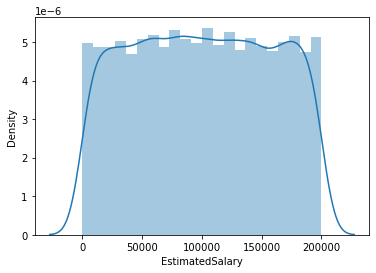

In [12]:
sns.distplot(df['EstimatedSalary'])
# the estimated salary forms a uniform distribution

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

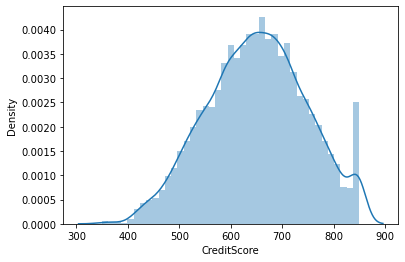

In [13]:
sns.distplot(df['CreditScore'])
# the credit score forms a Normal distribution

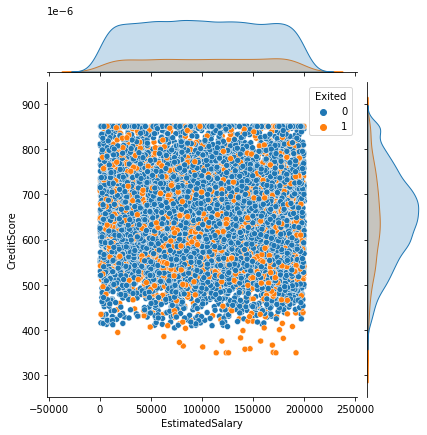

In [14]:
sns.jointplot(x='EstimatedSalary', y='CreditScore', hue='Exited', data=df)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

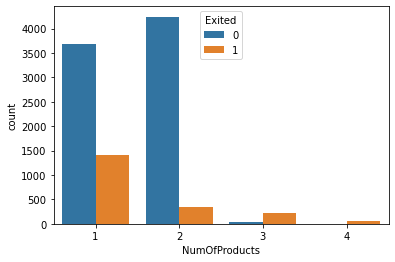

In [15]:
sns.countplot(x='NumOfProducts', hue='Exited', data=df)
#maximum number of products are 1 and 2

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

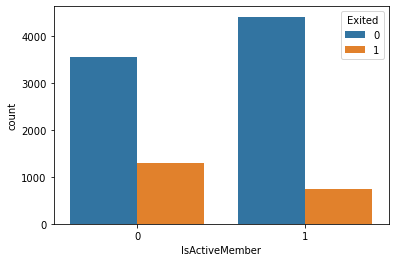

In [16]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

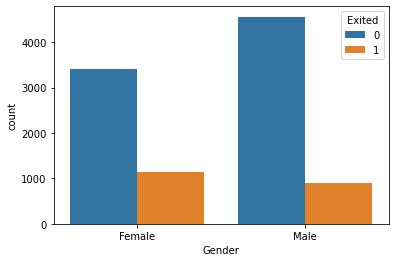

In [17]:
sns.countplot(x='Gender', hue='Exited', data=df)

<AxesSubplot:xlabel='Geography', ylabel='count'>

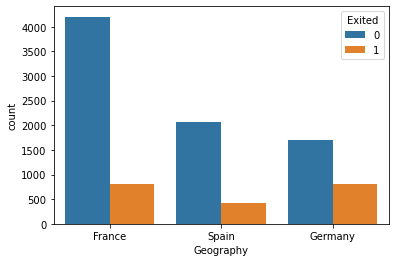

In [18]:
sns.countplot(x='Geography', hue='Exited', data=df)

In [19]:
len(df[df['Geography']=='France'][df['Exited']==1])/len(df[df['Geography']=='France'])

/tmp/ipykernel_145308/3085607262.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Geography']=='France'][df['Exited']==1])/len(df[df['Geography']=='France'])


0.16154766653370561

In [20]:
len(df[df['Geography']=='Spain'][df['Exited']==1])/len(df[df['Geography']=='Spain'])

/tmp/ipykernel_145308/1437385524.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Geography']=='Spain'][df['Exited']==1])/len(df[df['Geography']=='Spain'])


0.1667339523617279

In [21]:
len(df[df['Geography']=='Germany'][df['Exited']==1])/len(df[df['Geography']=='Germany'])

/tmp/ipykernel_145308/2661919817.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df['Geography']=='Germany'][df['Exited']==1])/len(df[df['Geography']=='Germany'])


0.32443204463929853

In [22]:
df.groupby(['Geography', 'Exited'])['EstimatedSalary'].count()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: EstimatedSalary, dtype: int64

In [23]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x1080 with 0 Axes>

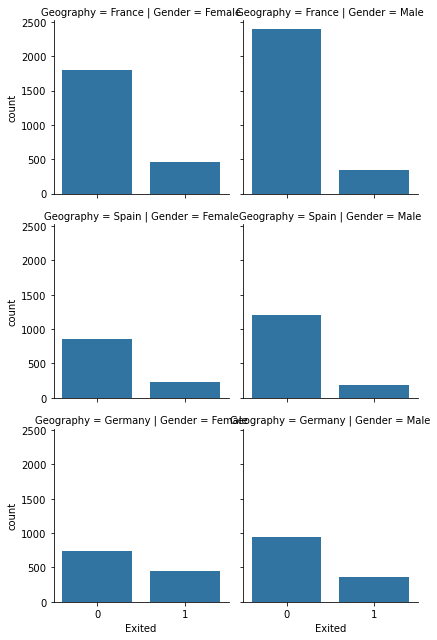

In [24]:
plt.figure(figsize=(12,15))
g = sns.FacetGrid(df, col="Gender",  row="Geography")
g.map(sns.countplot, "Exited")
g.tight_layout()

<Figure size 864x1080 with 0 Axes>

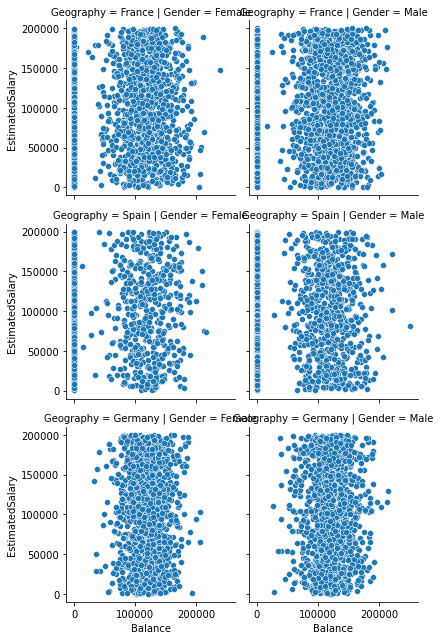

In [25]:
plt.figure(figsize=(12,15))
g = sns.FacetGrid(df, col="Gender",  row="Geography")
g.map(sns.scatterplot, "Balance", "EstimatedSalary")
g.tight_layout()

<Figure size 864x1080 with 0 Axes>

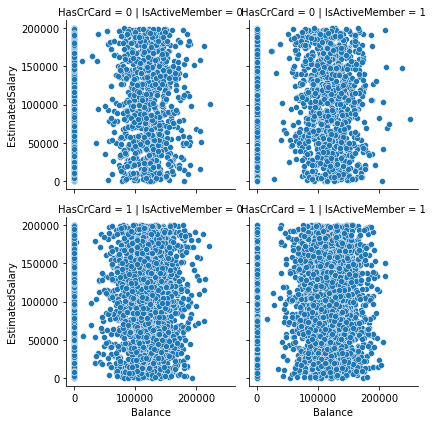

In [26]:
plt.figure(figsize=(12,15))
g = sns.FacetGrid(df, col="IsActiveMember",  row="HasCrCard")
g.map(sns.scatterplot, "Balance", "EstimatedSalary")
g.tight_layout()

/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x1080 with 0 Axes>

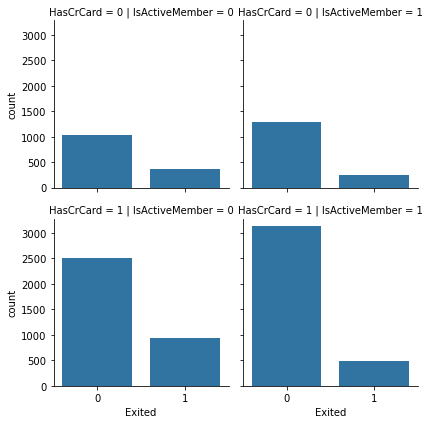

In [27]:
plt.figure(figsize=(12,15))
g = sns.FacetGrid(df,col="IsActiveMember",  row="HasCrCard")
g.map(sns.countplot, "Exited")
g.tight_layout()

In [28]:
df.isnull().sum()
# so we dont need to replace any missing value here

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [29]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [30]:
df.drop(labels=['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

In [31]:
df_test=df['Exited']

In [32]:
d={'France':0, 'Spain': 1, 'Germany':2}
df['Geography']=df['Geography'].map(d)

In [33]:
d={'Female':0, 'Male': 1}
df['Gender']=df['Gender'].map(d)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [79]:
df_train=df.copy()

In [81]:
df_train.drop(['Exited'], axis=1, inplace=True)
df_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,2,1,42,3,75075.31,2,1,0,92888.52


In [82]:
df_test

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [36]:
x_train, x_test, y_train, y_test=train_test_split(df_train, df_test)

In [37]:
#so lets first form a function for logistic regression:

def classification(x_train, x_test, y_train, y_test):
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pre=lr.predict(x_test)
    print(classification_report(pre,y_test))
    class1_f1, class2_f1, overall= classification_report(pre,y_test)[94:98], classification_report(pre,y_test)[148:152], classification_report(pre,y_test)[203:207]
    print("Class 0 f-score: "+ class1_f1)
    print("Class 1 f-score: "+class2_f1)
    print("Overall f-score: "+overall)

In [38]:
#lets perform the classification using imablanced dataset
classification(x_train, x_test, y_train, y_test)


              precision    recall  f1-score   support

           0       0.97      0.80      0.88      2415
           1       0.07      0.41      0.12        85

    accuracy                           0.79      2500
   macro avg       0.52      0.61      0.50      2500
weighted avg       0.94      0.79      0.85      2500

Class 0 f-score: 0.88
Class 1 f-score: 0.12
Overall f-score: 0.79


In [39]:
df_test.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [58]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [55]:
# lets undersample the majority class and see the performance. 

# df.drop([df.columns[-1]], axis=1, inplace=True)

In [57]:
df=pd.concat([df, df_test], axis=1)

In [59]:
df_class0=df[df['Exited']==0]
df_class1=df[df['Exited']==1]

In [60]:
df_class1.shape[0]

2037

In [61]:
df_class0_method1=df_class0.sample(df_class1.shape[0])

In [64]:
df_class0_method1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8040,624,1,0,36,10,0.00,2,0,1,186180.42,0
2686,530,2,0,42,0,99948.45,1,0,1,97338.62,0
4523,660,2,0,52,4,86891.84,1,1,0,90877.76,0
6722,662,0,1,29,5,147092.65,1,1,0,10928.30,0
8350,556,0,1,38,2,114756.14,1,1,0,193214.05,0
...,...,...,...,...,...,...,...,...,...,...,...
4237,498,0,0,29,9,0.00,1,1,0,190035.83,0
4155,587,1,1,41,8,85109.21,1,1,0,1557.82,0
479,658,0,1,29,4,80262.60,1,1,1,20612.82,0
4322,508,0,1,31,8,72541.48,1,1,0,129803.08,0


In [65]:
df_method1=pd.concat([df_class0_method1, df_class1], axis=0)

In [66]:
df_m1_test=df_method1['Exited']

In [67]:
df_m1_train=df_method1.copy()

In [68]:
df_m1_train.drop(['Exited'], axis=1, inplace=True)

In [69]:
x_train, x_test, y_train, y_test=train_test_split(df_m1_train, df_m1_test)

#lets perform the classification using method-1: Undersampling
classification(x_train, x_test, y_train, y_test)


              precision    recall  f1-score   support

           0       0.51      0.58      0.54       443
           1       0.64      0.57      0.60       576

    accuracy                           0.58      1019
   macro avg       0.58      0.58      0.57      1019
weighted avg       0.58      0.58      0.58      1019

Class 0 f-score: 0.54
Class 1 f-score: 0.60
Overall f-score: 0.58


In [70]:
# lets perform the same task using Method 2: Oversampling

df_class0=df[df['Exited']==0]
df_class1=df[df['Exited']==1]

In [72]:
df_class1_m2=df_class1.sample(df_class0.shape[0], replace=True)

In [74]:
df_class0.shape

(7963, 11)

In [75]:
df_m2=pd.concat([df_class0, df_class1_m2], axis=0)
df_m2_test=df_m2['Exited']
df_m2_train=df_m2.copy()
df_m2_train.drop(['Exited'], axis=1, inplace=True)

In [76]:
df_m2_test

1       0
3       0
4       0
6       0
8       0
       ..
2509    1
1096    1
5664    1
9554    1
5658    1
Name: Exited, Length: 15926, dtype: int64

In [77]:
x_train, x_test, y_train, y_test=train_test_split(df_m2_train, df_m2_test)

#lets perform the classification using method-1: Undersampling
classification(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.66      0.67      0.66      1926
           1       0.69      0.68      0.68      2056

    accuracy                           0.67      3982
   macro avg       0.67      0.67      0.67      3982
weighted avg       0.67      0.67      0.67      3982

Class 0 f-score: 0.66
Class 1 f-score: 0.68
Overall f-score: 0.67


In [214]:
# method 3: SMOTE

!pip install imblearn

In [211]:
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [213]:
pip install --upgrade pip

     |████████████████████████████████| 2.0 MB 1.1 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install Imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)
Note: you may need to restart the kernel to use updated packages.


In [78]:
from imblearn.over_sampling import SMOTE

In [87]:
smote=SMOTE(sampling_strategy='minority')

In [88]:
df_m3_train, df_m3_test=smote.fit_resample(df_train, df_test)

In [90]:
df_m3_test.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [91]:
x_train, x_test, y_train, y_test=train_test_split(df_m3_train, df_m3_test)

#lets perform the classification using method-1: Undersampling
classification(x_train, x_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      2022
           1       0.66      0.68      0.67      1960

    accuracy                           0.67      3982
   macro avg       0.67      0.67      0.67      3982
weighted avg       0.67      0.67      0.67      3982

Class 0 f-score: 0.67
Class 1 f-score: 0.67
Overall f-score: 0.67


/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#Create an instance
classifier = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(df_train, df_test)
preds = classifier.predict(df_test)

/home/sunit.kapuria/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BalancedBaggingClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1 0 1 ... 1 1 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [95]:
x_train, x_test, y_train, y_test=train_test_split(df_train, df_test)

#lets perform the classification using method-1: Undersampling
# classification(x_train, x_test, y_train, y_test)

In [97]:
y_train

5614    0
9992    0
2209    0
2493    0
5577    0
       ..
3512    0
6198    0
43      1
8437    0
155     1
Name: Exited, Length: 7500, dtype: int64